In [1]:
!pip install pddlgym
!pip install gym

pddlgym.structs.State

State(literals=frozenset({on(d:block,e:block), holding(a:block), ontable(f:block), on(b:block,c:block), on(c:block,d:block), clear(b:block), handfull(robot:robot), on(e:block,f:block)}), objects=frozenset({f:block, d:block, e:block, c:block, a:block, robot:robot, b:block}), goal=AND[on(b:block,c:block), on(c:block,d:block), on(d:block,e:block), on(e:block,f:block), on(f:block,a:block)])

pddlgym.structs.Literal

pddlgym.structs.TypedEntity

pddlgym.structs.LiteralConjunction

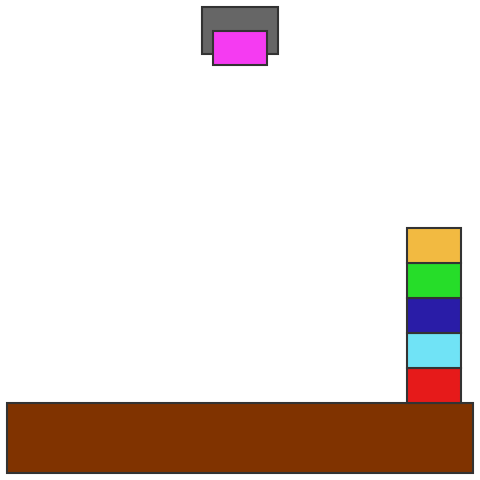

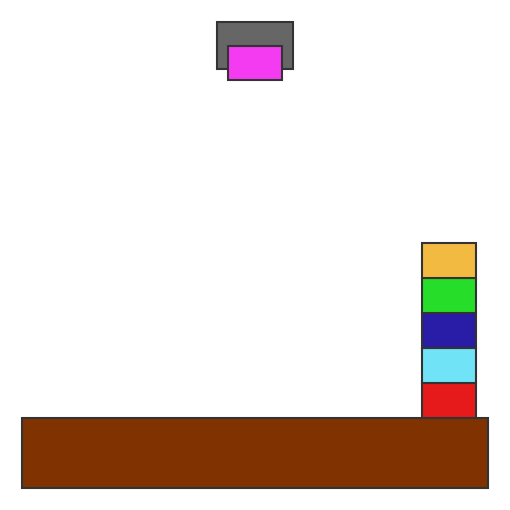

In [2]:
import gym
import pddlgym
import io
import imageio
import ipywidgets as widgets
#from IPython.display import Image # would work with a file
from PIL import Image # this works easiliy



def displayImageBytes(img):
    display(Image.fromarray(img))



env = gym.make("PDDLEnvBlocks-v0")
obs, debug_info = env.reset()

display(type(obs))
display(obs)
display(type(next(iter(obs.literals))))
display(type(next(iter(obs.objects))))
display(type(obs.goal))
display(Image.fromarray(env.render())) # expecting numpy array
#display(widgets.Image(filename="frame2.png")) # this won't work somehow

stack(e:block,c:block)


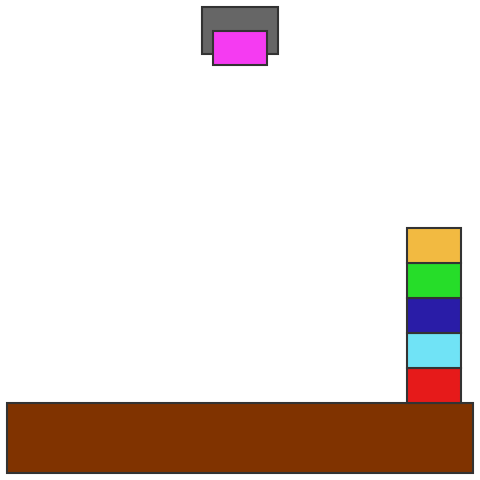

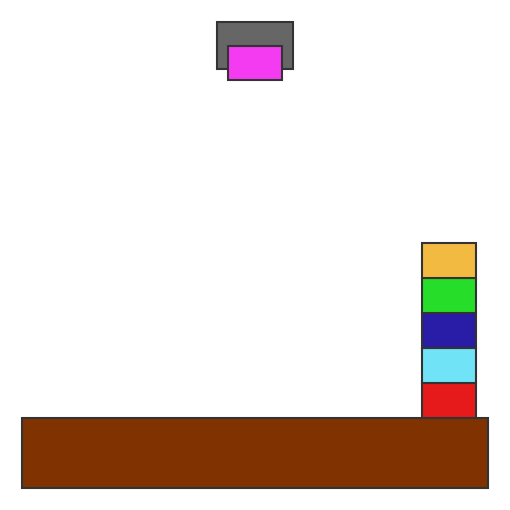

In [3]:
action = env.action_space.sample(obs)
print(action)

obs, reward, done, debug_info = env.step(action)
display(Image.fromarray(env.render())) # expecting numpy array

In [4]:
print(env.action_space.all_ground_literals(obs))

{stack(a:block,f:block), stack(c:block,f:block), stack(b:block,d:block), stack(e:block,c:block), stack(e:block,f:block), stack(f:block,a:block), unstack(d:block), stack(c:block,b:block), stack(e:block,b:block), stack(f:block,d:block), stack(c:block,a:block), putdown(b:block), stack(a:block,c:block), unstack(e:block), stack(f:block,e:block), stack(a:block,b:block), pickup(e:block), putdown(a:block), stack(a:block,d:block), stack(d:block,b:block), stack(b:block,c:block), stack(b:block,f:block), stack(f:block,c:block), stack(a:block,e:block), stack(f:block,b:block), putdown(d:block), putdown(e:block), pickup(d:block), stack(e:block,a:block), stack(b:block,e:block), stack(c:block,d:block), putdown(f:block), unstack(c:block), stack(d:block,e:block), stack(d:block,c:block), stack(c:block,e:block), stack(d:block,f:block), stack(d:block,a:block), unstack(a:block), stack(b:block,a:block), pickup(f:block), pickup(a:block), unstack(f:block), unstack(b:block), pickup(c:block), putdown(c:block), st

putdown(a:block)
<class 'pddlgym.structs.Predicate'>
putdown
[<class 'pddlgym.structs.TypedEntity'>]
['a block']


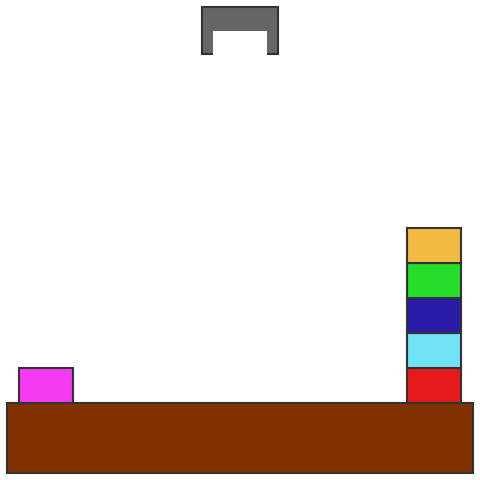

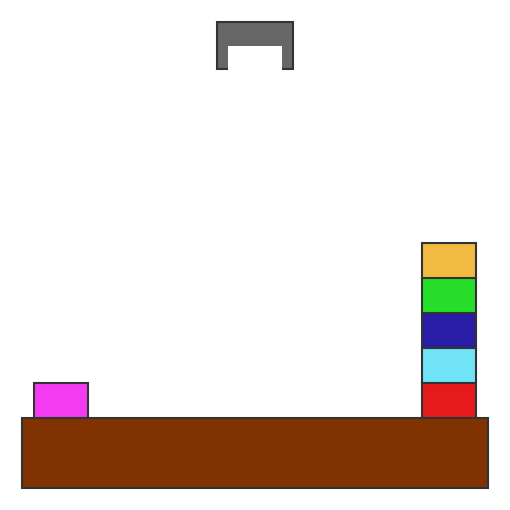

In [11]:
from pddlgym.structs import Literal, Predicate, Type, TypedEntity

action = Predicate('putdown', 1, [Type('block')])('a')
print(action)
assert type(action) == Literal
print(type(action.predicate))
print(action.predicate.name)
assert type(action.variables) == list
print([type(v) for v in action.variables]) # TypedEntity or str
print([f"{v.name} {v.var_type}" if type(v) is TypedEntity else v for v in action.variables]) # TypedEntity or str


obs, reward, done, debug_info = env.step(action)
display(Image.fromarray(env.render()))